## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\online retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France


## Dataset 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 숫자 데이터 컬럼의 통계정보 확인

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 숫자 데이터가 아닌 컬럼의 통계정보 확인

In [5]:
df.describe( exclude = 'number' )

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### 결측치 확인

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data 전처리

## 결측치 제거

In [7]:
# CustomerID 가 NaN 값인 행 제거

df_retail = df[ df['CustomerID'].notnull() ]

In [8]:
df_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 오류값 제거

In [9]:
# Quantity와 UnitPrice에 음수값이 있으므로 이를 제외

df_retail = df_retail[ df_retail['Quantity'] > 0 ]
df_retail = df_retail[ df_retail['UnitPrice'] > 0 ]

## 중요한 데이터만 추리기

In [10]:
# Country 컬럼을 살펴보면 전체 541909건의 데이터 중 495478 건이 United Kingdom 이다.
# United Kingdom 데이터만 추출
df_retail = df_retail[ df_retail['Country'] == 'United Kingdom' ]

In [11]:
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49,8.95,13113.0,United Kingdom


# Data 가공

## data type 변환

In [12]:
# CustomerID 의 식별을 원활히 하기 위해 int type 으로 변환
df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)

# InvoiceDate 의 dtype 을 datetime 으로 변환
df_retail['InvoiceDate'] = pd.to_datetime( df_retail['InvoiceDate'] )

## 파생변수 생성

In [13]:
df_retail['sale_amount'] = df_retail['Quantity'] * df_retail['UnitPrice']

In [14]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int32         
 7   Country      354321 non-null  object        
 8   sale_amount  354321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 25.7+ MB


In [15]:
df_retail['CustomerID'].value_counts().head(10)

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
13089    1818
13263    1677
14298    1637
15039    1502
18118    1279
Name: CustomerID, dtype: int64

In [16]:
df_retail.groupby('CustomerID')['sale_amount'].sum().sort_values( ascending = False ).head(10)

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
12346     77183.60
16684     66653.56
14096     65164.79
13694     65039.62
15311     60767.90
Name: sale_amount, dtype: float64

## 새로운 분석용 데이터프레임 생성

In [17]:
#https://yuddomack.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-datetime-%EB%82%A0%EC%A7%9C-%EA%B3%84%EC%82%B0

from datetime import datetime

# 오늘날짜 - 구매일자
df_retail['term'] = datetime.today() - df_retail['InvoiceDate']

# 계산결과는 timedelta 클래스로 반환됨. 일 단위로 변환 수행
df_retail['term'] = df_retail['term'].apply(lambda x: x.days)

# 고객별 최근 구입일에서 현재까지의 기간 ( Recency )
r = df_retail.groupby('CustomerID')['term'].min()  # 가장 최근구매일로부터의 기간이므로 최소값을 구함.
r

CustomerID
12346    3885
12747    3562
12748    3560
12749    3563
12820    3563
         ... 
18280    3837
18281    3740
18282    3567
18283    3563
18287    3602
Name: term, Length: 3920, dtype: int64

In [18]:
# 고객별 주문 건수 ( Frequency )
f = df_retail.groupby('CustomerID')['InvoiceNo'].count()
f

CustomerID
12346       1
12747     103
12748    4595
12749     199
12820      59
         ... 
18280      10
18281       7
18282      12
18283     756
18287      70
Name: InvoiceNo, Length: 3920, dtype: int64

In [19]:
# 고객별 총 주문금액 ( Monetary value )
m = df_retail.groupby('CustomerID')['sale_amount'].sum()
m

CustomerID
12346    77183.60
12747     4196.01
12748    33719.73
12749     4090.88
12820      942.34
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: sale_amount, Length: 3920, dtype: float64

In [20]:
df_anal = pd.DataFrame( { 'Recency': r,
                          'Frequency': f,
                          'Monetary': m } )
df_anal

,Recency,Frequency,Monetary
CustomerID,,,
12346,3885,1,77183.60
12747,3562,103,4196.01
12748,3560,4595,33719.73
12749,3563,199,4090.88
12820,3563,59,942.34
...,...,...,...
18280,3837,10,180.60
18281,3740,7,80.82
18282,3567,12,178.05


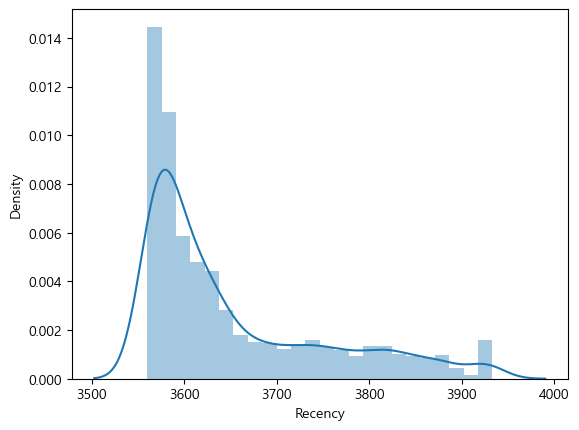

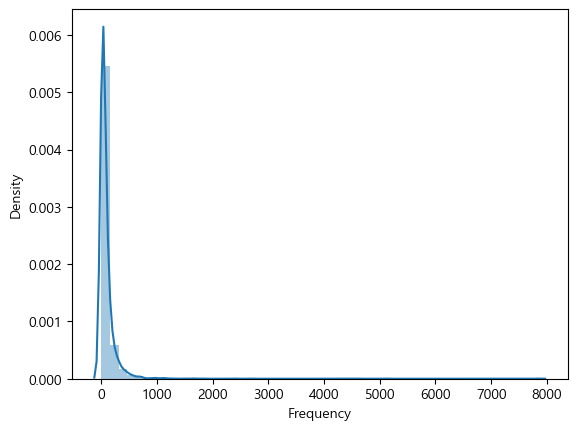

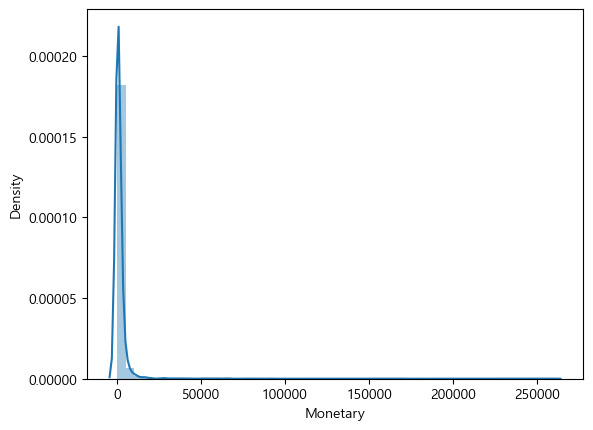

In [21]:
for i in list(range(0,3)):
    sb.distplot(df_anal.iloc[:,i])
    plt.show()

# k-means 모델 생성 및 군집화 수행
- `sklearn.cluster.KMeans()`  - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- Attributes : `cluster_centers_` : 클러스터 중심의 좌표
- Attributes : `labels_` : 각 지점의 label
- Attributes : `inertia_` : sample과 그 sample로부터 가장 가까운 클러스터의 중심까지 거리의 제곱 합. 즉, 오차제곱합. 군집 내의 분산을 의미함. 
- Attributes : `n_iter_` : 반복 실행 횟수

- Methods : `.fit()`, `.fit_predict()`, `.predict()`, `.transform()`, `.fit_transform()`

In [22]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

# n_clusters : int, default=8

# init : k-means++ : 수렴 속도를 높이기 위해 스마트 방식으로 k-mean 군집화를 위한 초기 군집 중심을 선택
#        random : n_clusters초기 중심에 대한 데이터에서 무작위로 관측값(행)을 선택

# max_iter: int, default=300. 단일 실행에 대한 k평균 알고리즘의 최대 반복 횟수

def kmeans(i):
    model_kmeans = KMeans( n_clusters = i,
                           init = 'random',
                           max_iter = 50,
                           random_state = 153 )
    return model_kmeans

# 데이터의 분포/왜곡에 대한 조정없이 군집화를 수행할 경우

## 모델 학습에 사용할 x값(예측변수) 설정

In [23]:
x = df_anal[ ['Recency', 'Frequency', 'Monetary'] ]
x

,Recency,Frequency,Monetary
CustomerID,,,
12346,3885,1,77183.60
12747,3562,103,4196.01
12748,3560,4595,33719.73
12749,3563,199,4090.88
12820,3563,59,942.34
...,...,...,...
18280,3837,10,180.60
18281,3740,7,80.82
18282,3567,12,178.05


## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

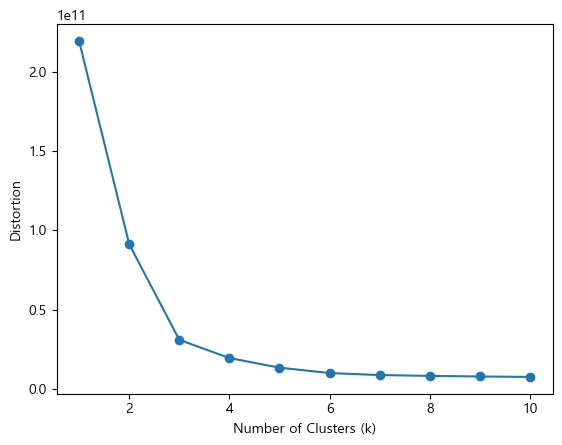

In [24]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model_kmeans = kmeans(i).fit(x)
    inertia.append(model_kmeans.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 선정된 k값 모델로 학습

In [25]:
# k를 3개로 설정하고 군집 모델 학습
model_kmeans = kmeans(3).fit(x)

## 군집화 결과 확인

In [26]:
# 각각의 클러스터의 중심 확인
print('< centers >')
print(model_kmeans.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model_kmeans.labels_)

< centers >
[[3.65228042e+03 8.30872138e+01 1.35822854e+03]
 [3.56266667e+03 2.57000000e+02 2.07560197e+05]
 [3.59090000e+03 1.01966667e+03 4.68758870e+04]]

< labels >
[2 0 2 ... 0 0 0]


In [27]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result = df_anal.copy()

df_result['km_cluster'] = model_kmeans.labels_

df_result.groupby( ['km_cluster'] ).count()

,Recency,Frequency,Monetary
km_cluster,,,
0,3887,3887,3887
1,3,3,3
2,30,30,30


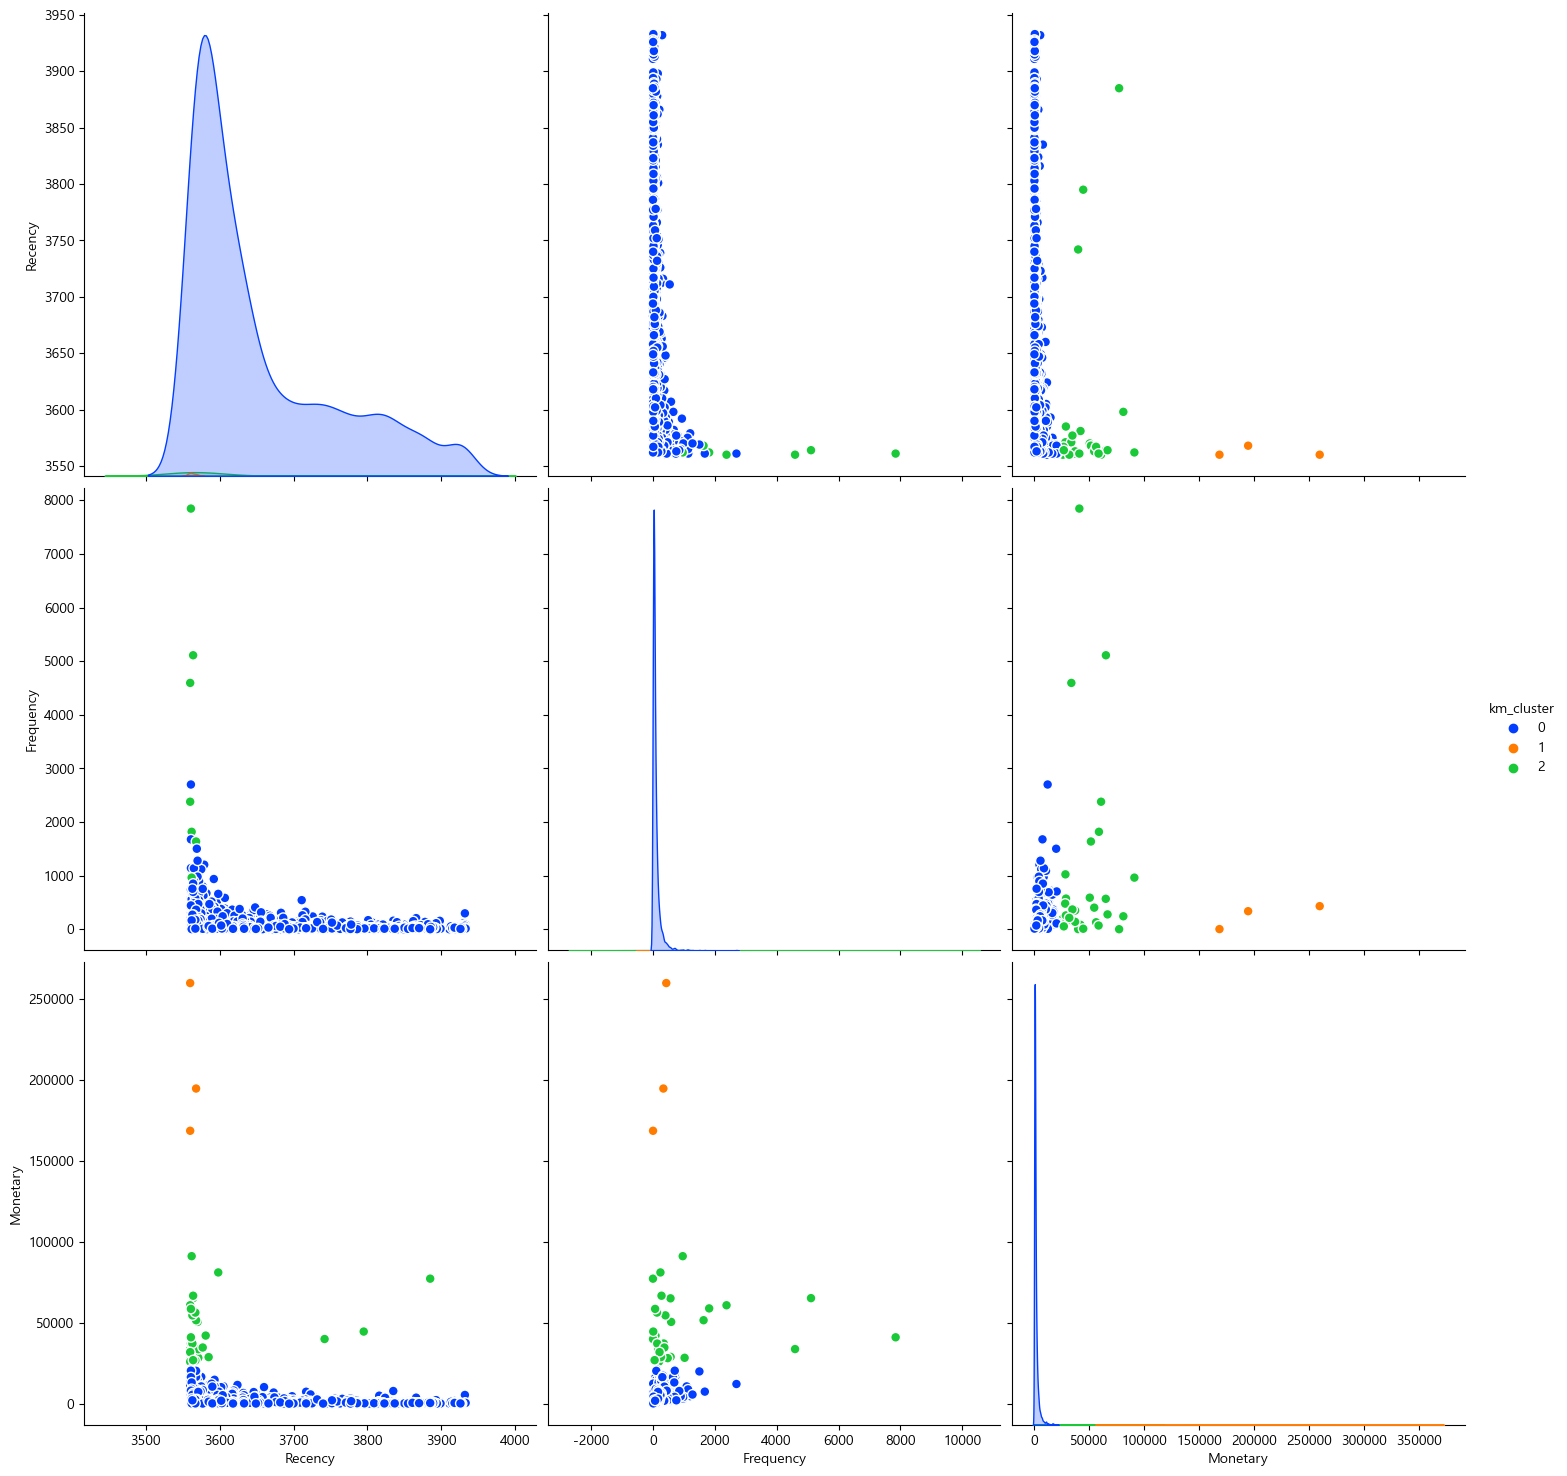

In [28]:
sb.pairplot( df_result,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 내부 평가 ( Silhouette Coefficient )
- 개별 데이터 각각의 실루엣 계수: `sklearn.metrics.silhouette_samples()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

- 전체 데이터의 평균 실루엣 계수: `sklearn.metrics.silhouette_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

$s(i)$ $=$ $b(i)-a(i)\over max( a(i),b(i) )$

### 개별 데이터 각각의 실루엣 계수 산출

In [29]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, model_kmeans.labels_ )

print('< 개별 데이터 각각의 실루엣 계수 >\n', score_samples)

< 개별 데이터 각각의 실루엣 계수 >
 [0.5692218  0.92294738 0.45614089 ... 0.9734727  0.95914239 0.9668492 ]


In [30]:
# df_result에 실루엣 계수 컬럼 추가
df_result['silhouette_coeff'] = score_samples
df_result

,Recency,Frequency,Monetary,km_cluster,silhouette_coeff
CustomerID,,,,,
12346,3885,1,77183.60,2,0.569222
12747,3562,103,4196.01,0,0.922947
12748,3560,4595,33719.73,2,0.456141
12749,3563,199,4090.88,0,0.925238
12820,3563,59,942.34,0,0.975742
...,...,...,...,...,...
18280,3837,10,180.60,0,0.973204
18281,3740,7,80.82,0,0.972104
18282,3567,12,178.05,0,0.973473


In [31]:
# 군집별 평균 실루엣 계수
group_silhouette = df_result.groupby('km_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette)

< 군집별 평균 실루엣 계수 >
 km_cluster
0    0.961261
1    0.613970
2    0.504544
Name: silhouette_coeff, dtype: float64


### 평균 실루엣 계수 산출

In [32]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, model_kmeans.labels_ )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )

전체 평균 실루엣 계수: 0.9575


### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

In [33]:
# 반복적인 사용의 편의를 위해 함수로 정의

def silhouette_avg_k(a,b):
    avg_silhouette = list()
    print('< Average_Silhouette_Score by k >')
    print()
    
    i = 0
    for i in range(a,b):
        model_kmeans = kmeans(i).fit(x)
        
        average_score = silhouette_score( x, model_kmeans.labels_ )
        print( 'k =',i,': ', average_score )
        
        avg_silhouette.append(average_score)
    
    print()
    plt.plot(range(a,b), avg_silhouette, '-o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average_Silhouette')
    plt.show()

< Average_Silhouette_Score by k >

k = 2 :  0.9745649615414972
k = 3 :  0.9575002917451106
k = 4 :  0.8386821971419083
k = 5 :  0.7769186026452712
k = 6 :  0.7236215123188868



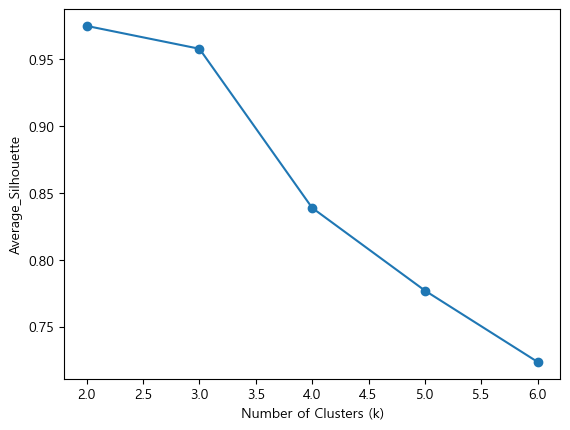

In [34]:
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,7)

In [35]:
# 반복적인 사용의 편의를 위해 함수로 정의
def silhouette_avg_vs_group(a,b):
    print('< Average_Silhouette_Score >')
    print()
    
    i = 0
    for i in range(a,b):
        model_kmeans = kmeans(i).fit(x)
        
        score_samples = silhouette_samples( x, model_kmeans.labels_ )
        average_score = silhouette_score( x, model_kmeans.labels_ )
        
        df = pd.DataFrame( { 'group' : model_kmeans.labels_,
                             'Coeff' : score_samples,
                             'Avg' : average_score } )
        df['Coeff-avg'] = df['Coeff'] - df['Avg']
        
        display( df.groupby(['Avg','group'])[ ['Coeff','Coeff-avg'] ].mean() ) 

In [36]:
# k를 2부터 6까지 변화시켜가며 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,7)

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg      group                     
0.974565 0      0.977116   0.002551
         1      0.352188  -0.622377

Coeff  Coeff-avg
Avg    group                     
0.9575 0      0.613970  -0.343530
       1      0.961261   0.003761
       2      0.504544  -0.452956

Coeff  Coeff-avg
Avg      group                     
0.838682 0      0.385534  -0.453148
         1      0.598155  -0.240527
         2      0.862923   0.024241
         3      0.502042  -0.336640

Coeff  Coeff-avg
Avg      group                     
0.776919 0      0.388208  -0.388711
         1      0.428137  -0.348782
         2      0.566847  -0.210071
         3      0.584642  -0.192276
         4      0.816849   0.039931

Coeff  Coeff-avg
Avg      group                     
0.723622 0      0.522349  -0.201272
         1      0.610019  -0.113603
         2      0.459547  -0.264074
         3      0.562107  -0.161515
         4      0.459100  -0.264521
         5      0.777625   0.054004

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

In [37]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

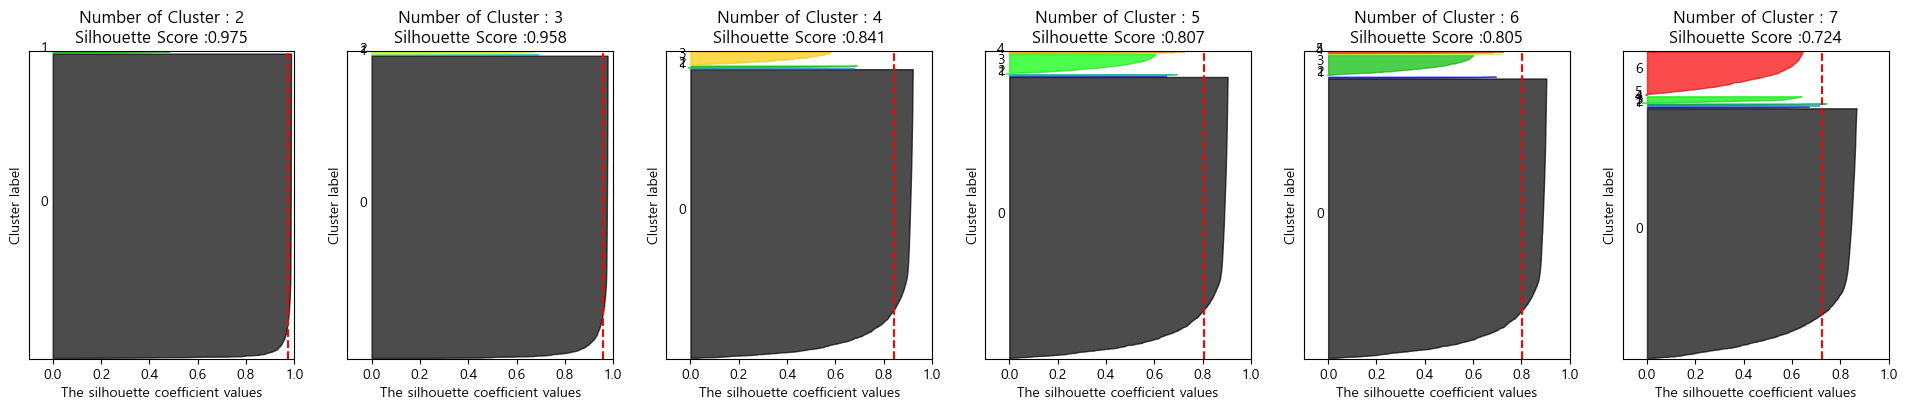

In [38]:
# cluster 개수를 2~7개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette( list(range(2,8)), x)

# 데이터의 평균 및 표준편차 재조정 후 군집화 수행
- 평균과 표준편차를 재조정

- `sklearn.preprocessing.StandardScaler()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- Methods : `.fit_transform()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

## 데이터의 분포/왜곡 확인

In [39]:
df_anal.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,3651.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,3560.000000,1.000000,3.750000
25%,3577.000000,17.000000,300.280000
50%,3610.000000,41.000000,652.280000
75%,3702.000000,99.250000,1576.585000
max,3933.000000,7847.000000,259657.300000


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

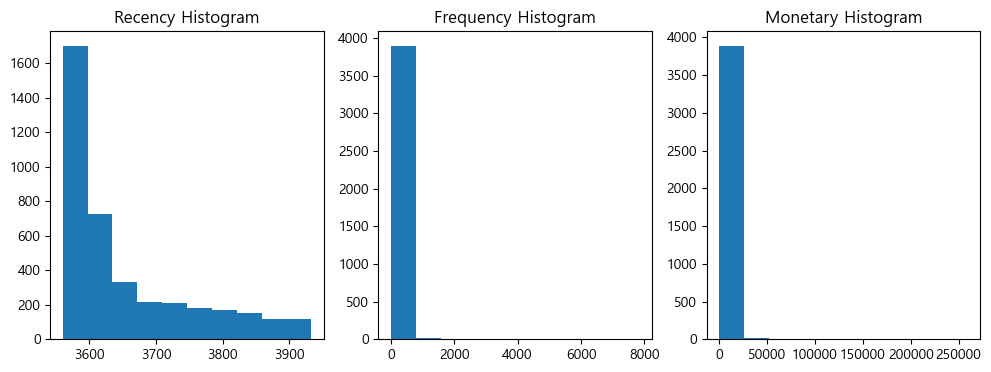

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(df_anal['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(df_anal['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(df_anal['Monetary'])

## 평균과 표준편차를 재조정

In [41]:
x = df_anal[ ['Recency', 'Frequency', 'Monetary'] ]

x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 2.34381090e+00, -4.10449826e-01,  1.00669064e+01],
       [-9.01742172e-01,  5.79114471e-02,  3.11636875e-01],
       [-9.21838476e-01,  2.06841746e+01,  4.25767546e+00],
       ...,
       [-8.51501413e-01, -3.59940277e-01, -2.25389800e-01],
       [-8.91694020e-01,  3.05634195e+00,  3.08070865e-02],
       [-4.99816095e-01, -9.36172002e-02, -3.62284108e-03]])

In [42]:
df_anal_scaled = pd.DataFrame( { 'Recency_scaled' : x_scaled[:,0],
                                 'Frequency_scaled' : x_scaled[:,1],
                                 'Monetary_scaled' : x_scaled[:,2] } )

df_anal_scaled

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2.343811,-0.410450,10.066906
1,-0.901742,0.057911,0.311637
2,-0.921838,20.684175,4.257675
3,-0.891694,0.498722,0.297586
4,-0.891694,-0.144127,-0.123237
...,...,...,...
3915,1.861500,-0.369124,-0.225049
3916,0.886829,-0.382899,-0.238385
3917,-0.851501,-0.359940,-0.225390
3918,-0.891694,3.056342,0.030807


In [43]:
df_anal_scaled.describe()

,Recency_scaled,Frequency_scaled,Monetary_scaled
count,3.920000e+03,3.920000e+03,3.920000e+03
mean,-5.355410e-16,-1.125446e-17,1.963313e-17
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.218385e-01,-4.104498e-01,-2.486861e-01
25%,-7.510199e-01,-3.369814e-01,-2.090530e-01
50%,-4.194309e-01,-2.267787e-01,-1.620059e-01
75%,5.049991e-01,4.069228e-02,-3.846644e-02
max,2.826122e+00,3.561663e+01,3.445571e+01


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.24868614,  3.22175366,  6.69219345, 10.16263324, 13.63307304,
        17.10351283, 20.57395263, 24.04439242, 27.51483221, 30.98527201,
        34.4557118 ]),
 <BarContainer object of 10 artists>)

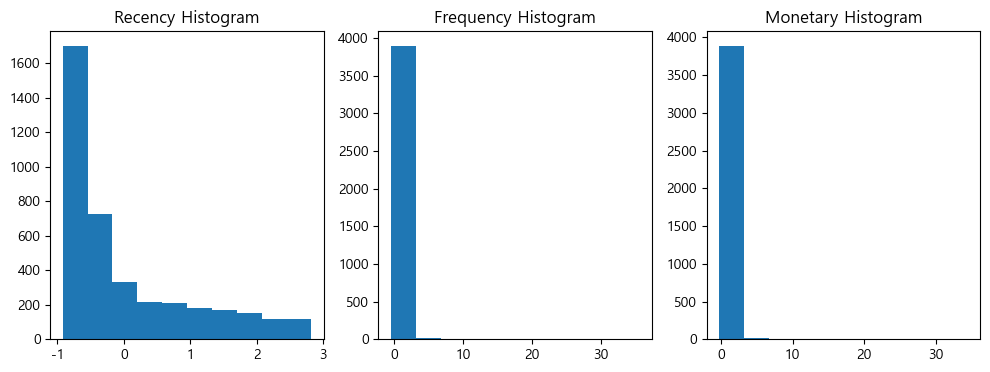

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(df_anal_scaled['Recency_scaled'])

ax2.set_title('Frequency Histogram')
ax2.hist(df_anal_scaled['Frequency_scaled'])

ax3.set_title('Monetary Histogram')
ax3.hist(df_anal_scaled['Monetary_scaled'])

## 모델 학습에 사용할 x값(예측변수) 설정

In [45]:
x2 = df_anal_scaled[ ['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'] ]
x2

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2.343811,-0.410450,10.066906
1,-0.901742,0.057911,0.311637
2,-0.921838,20.684175,4.257675
3,-0.891694,0.498722,0.297586
4,-0.891694,-0.144127,-0.123237
...,...,...,...
3915,1.861500,-0.369124,-0.225049
3916,0.886829,-0.382899,-0.238385
3917,-0.851501,-0.359940,-0.225390
3918,-0.891694,3.056342,0.030807


## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

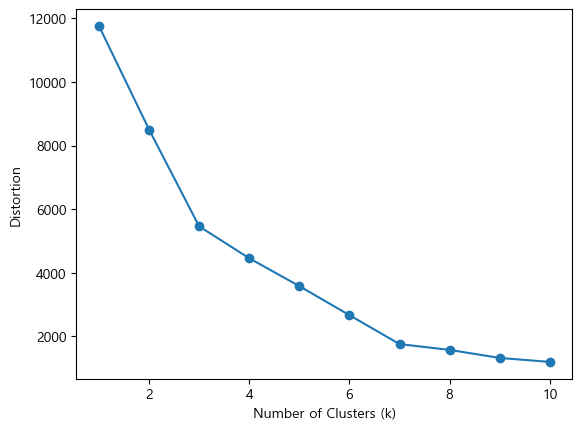

In [46]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model_kmeans = kmeans(i).fit(x2)
    inertia.append(model_kmeans.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 선정된 k값 모델로 학습

In [47]:
# k를 3개로 설정하고 군집 모델 학습
model_kmeans = kmeans(3).fit(x2)

## 군집화 결과 확인

In [48]:
# 각각의 클러스터의 중심 확인
print('< centers >')
print(model_kmeans.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model_kmeans.labels_)

< centers >
[[-5.13356865e-01  5.34139246e-02  2.15878800e-03]
 [-6.56567265e-01  8.43453752e+00  1.15731655e+01]
 [ 1.53807599e+00 -2.87827866e-01 -1.83205315e-01]]

< labels >
[1 0 1 ... 0 0 0]


In [49]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result_2 = df_anal_scaled.copy()

df_result_2['km_cluster'] = model_kmeans.labels_

df_result_2.groupby( ['km_cluster'] ).count()

,Recency_scaled,Frequency_scaled,Monetary_scaled
km_cluster,,,
0,2923,2923,2923
1,15,15,15
2,982,982,982


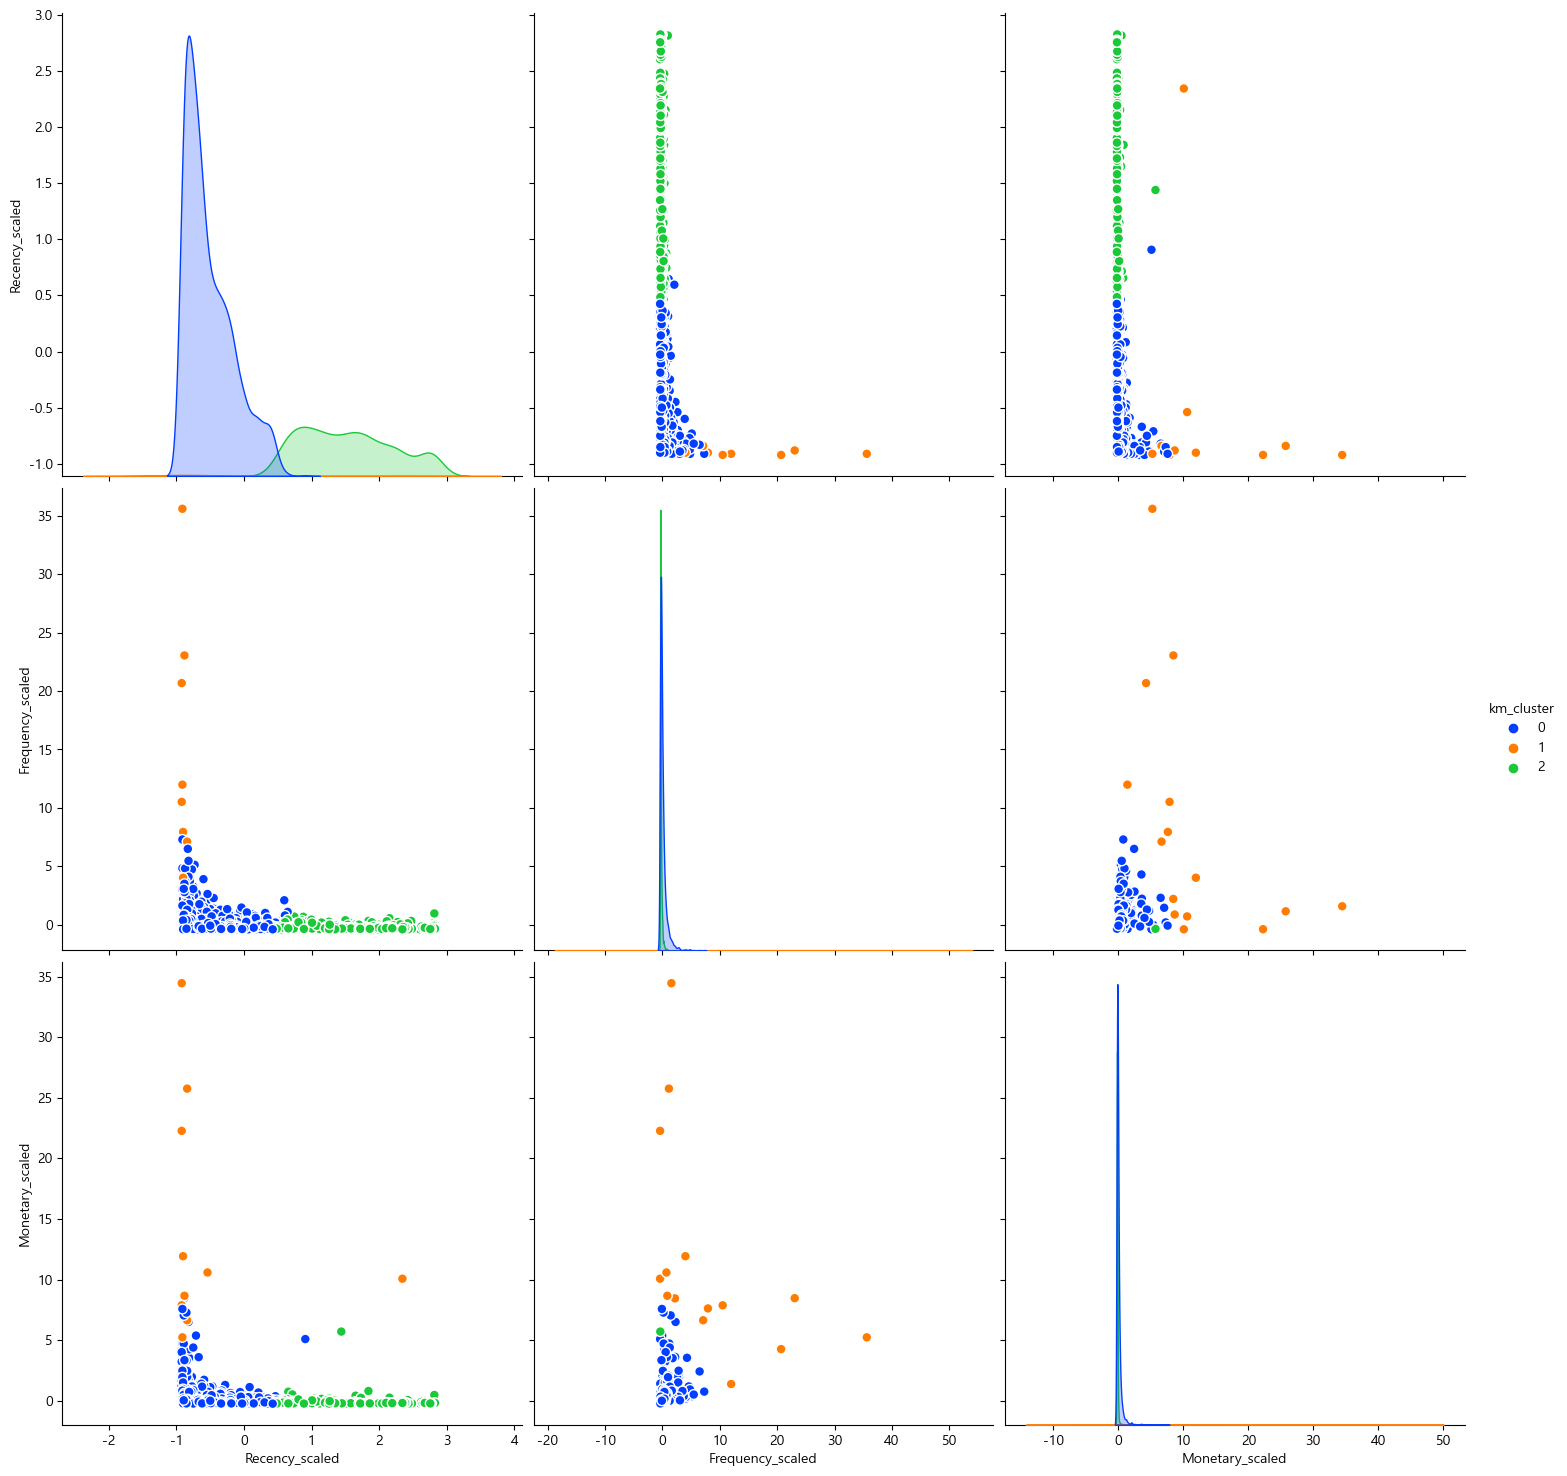

In [50]:
sb.pairplot( df_result_2,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 평가

### 개별 데이터 각각의 실루엣 계수 산출

In [51]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x2, model_kmeans.labels_ )

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
score_samples

silhouette_samples( ) return 값의 shape (3920,)


array([-0.27168993,  0.67218748,  0.11896745, ...,  0.68534598,
        0.25686379,  0.70736686])

In [52]:
# df_result_2에 실루엣 계수 컬럼 추가
df_result_2['silhouette_coeff'] = score_samples
df_result_2

,Recency_scaled,Frequency_scaled,Monetary_scaled,km_cluster,silhouette_coeff
0,2.343811,-0.410450,10.066906,1,-0.271690
1,-0.901742,0.057911,0.311637,0,0.672187
2,-0.921838,20.684175,4.257675,1,0.118967
3,-0.891694,0.498722,0.297586,0,0.634011
4,-0.891694,-0.144127,-0.123237,0,0.713307
...,...,...,...,...,...
3915,1.861500,-0.369124,-0.225049,2,0.732547
3916,0.886829,-0.382899,-0.238385,2,0.509514
3917,-0.851501,-0.359940,-0.225390,0,0.685346
3918,-0.891694,3.056342,0.030807,0,0.256864


In [53]:
# 군집별 평균 실루엣 계수
group_silhouette_2 = df_result_2.groupby('km_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette_2)

< 군집별 평균 실루엣 계수 >
 km_cluster
0    0.594573
1   -0.026296
2    0.595258
Name: silhouette_coeff, dtype: float64


### 평균 실루엣 계수 산출

In [54]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x2, model_kmeans.labels_ )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )

전체 평균 실루엣 계수: 0.5924


### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score by k >

k = 2 :  0.5667257984585801
k = 3 :  0.5923691942714455
k = 4 :  0.6112840954318207
k = 5 :  0.4388936399696993
k = 6 :  0.514217028201228
k = 7 :  0.5238509300520265
k = 8 :  0.39030175730761585



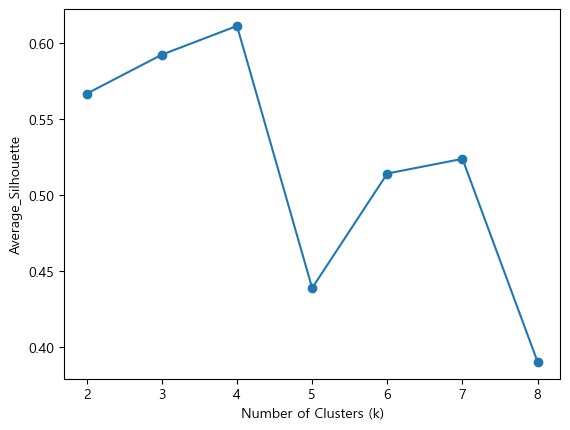

In [55]:
x = x2

# k를 2부터 8까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,9)

In [56]:
x = x2

# k를 2부터 8까지 변화시켜가며 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,9)

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg      group                     
0.566726 0      0.555007  -0.011719
         1      0.601177   0.034451

Coeff  Coeff-avg
Avg      group                     
0.592369 0      0.594573   0.002204
         1     -0.026296  -0.618665
         2      0.595258   0.002889

Coeff  Coeff-avg
Avg      group                     
0.611284 0      0.094280  -0.517005
         1     -0.037002  -0.648287
         2      0.665663   0.054379
         3      0.581740  -0.029544

Coeff  Coeff-avg
Avg      group                     
0.438894 0      0.335243  -0.103651
         1      0.161990  -0.276904
         2      0.407259  -0.031635
         3      0.434626  -0.004268
         4      0.595002   0.156108

Coeff  Coeff-avg
Avg      group                     
0.514217 0      0.181194  -0.333023
         1      0.111059  -0.403158
         2      0.557879   0.043662
         3      0.457248  -0.056969
         4      0.572656   0.058439
         5      0.207223  -0.306994

Coeff  Coeff-avg
Avg      group                     
0.523851 0      0.613827   0.089976
         1      0.136403  -0.387448
         2      0.570029   0.046178
         3      0.460147  -0.063704
         4      0.571432   0.047581
         5      0.537941   0.014090
         6      0.257359  -0.266492

Coeff  Coeff-avg
Avg      group                     
0.390302 0      0.341030  -0.049271
         1      0.226675  -0.163627
         2      0.411641   0.021339
         3      0.216822  -0.173479
         4      0.534177   0.143875
         5      0.461798   0.071497
         6      0.548492   0.158190
         7      0.605033   0.214731

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

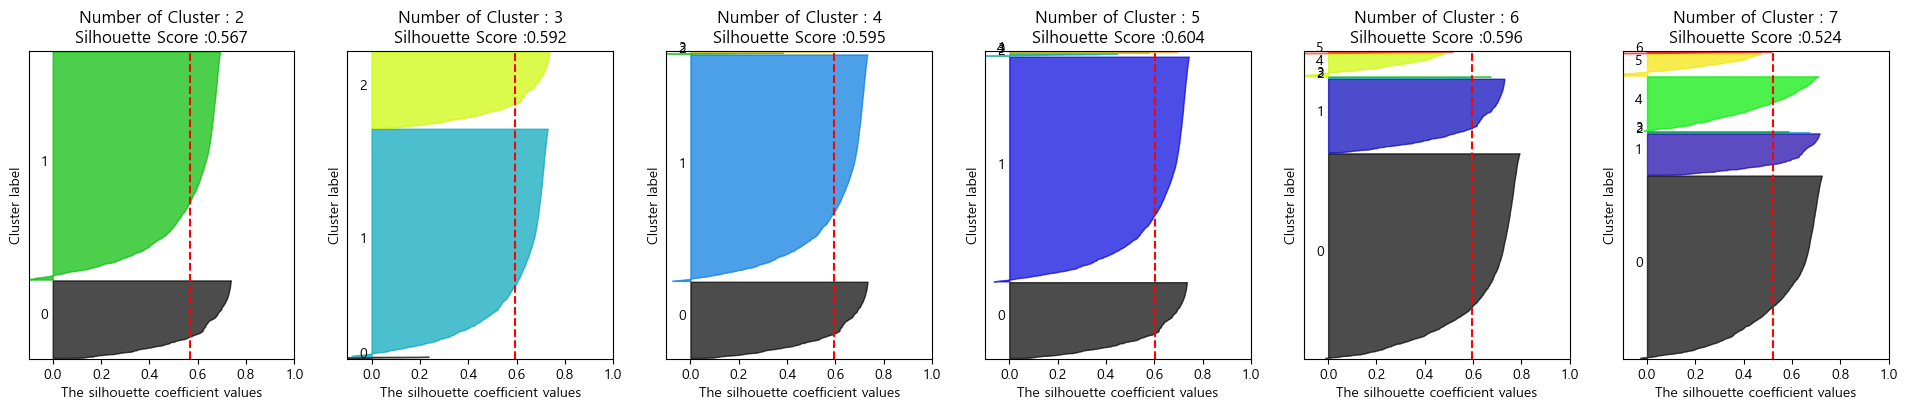

In [57]:
# cluster 개수를 2~6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette( list(range(2,8)), x2)

# 전체 데이터를 로그변환 후 군집화 수행

- `numpy.log1p()`  https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

## 데이터의 로그변환 수행

In [58]:
# Recency, Frequecny, Monetary 데이터에 np.log1p() 로 Log Transformation
df_anal_log = pd.DataFrame( { 'Recency_log' : np.log1p(df_anal['Recency']),
                              'Frequency_log' : np.log1p(df_anal['Frequency']),
                              'Monetary_log' : np.log1p(df_anal['Monetary']) } )

df_anal_log

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,8.265136,0.693147,11.253955
12747,8.178358,4.644391,8.342128
12748,8.177797,8.432942,10.425868
12749,8.178639,5.298317,8.316760
12820,8.178639,4.094345,6.849427
...,...,...,...
18280,8.252707,2.397895,5.201806
18281,8.227108,2.079442,4.404522
18282,8.179760,2.564949,5.187665


## 로그변환된 데이터에 StandardScaler 적용

In [59]:
# Log Transformation 데이터에 StandardScaler 적용
x_log_scaled = StandardScaler().fit_transform(df_anal_log)
x_log_scaled

array([[ 2.32265218, -2.40338709,  3.78591383],
       [-0.91435866,  0.73257781,  1.44428   ],
       [-0.93530332,  3.73941895,  3.1199826 ],
       ...,
       [-0.86204841, -0.91780272, -1.09247605],
       [-0.90389074,  2.30798143,  0.88585825],
       [-0.49791631,  0.42962703,  0.78039553]])

In [60]:
# df_anal_log 데이터프레임에 log변환과 scale변환이 진행된 값을 입력

df_anal_log['Recency_log'] = x_log_scaled[:,0]
df_anal_log['Frequency_log'] = x_log_scaled[:,1]
df_anal_log['Monetary_log'] = x_log_scaled[:,2]

df_anal_log

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,2.322652,-2.403387,3.785914
12747,-0.914359,0.732578,1.444280
12748,-0.935303,3.739419,3.119983
12749,-0.903891,1.251577,1.423880
12820,-0.903891,0.296025,0.243880
...,...,...,...
18280,1.859022,-1.050388,-1.081104
18281,0.904138,-1.303133,-1.722264
18282,-0.862048,-0.917803,-1.092476


In [61]:
df_anal_log.describe()

,Recency_log,Frequency_log,Monetary_log
count,3.920000e+03,3.920000e+03,3.920000e+03
mean,-7.554331e-15,2.684927e-17,-4.020027e-16
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.353033e-01,-2.403387e+00,-4.011264e+00
25%,-7.576475e-01,-6.595263e-01,-6.740009e-01
50%,-4.151828e-01,1.294462e-02,-5.159317e-02
75%,5.232927e-01,7.034240e-01,6.574079e-01
max,2.780591e+00,4.164087e+00,4.761518e+00


(array([   4.,   26.,  242., 1029., 1288.,  923.,  323.,   59.,   22.,
           4.]),
 array([-4.01126423, -3.13398598, -2.25670773, -1.37942948, -0.50215123,
         0.37512702,  1.25240527,  2.12968352,  3.00696177,  3.88424002,
         4.76151827]),
 <BarContainer object of 10 artists>)

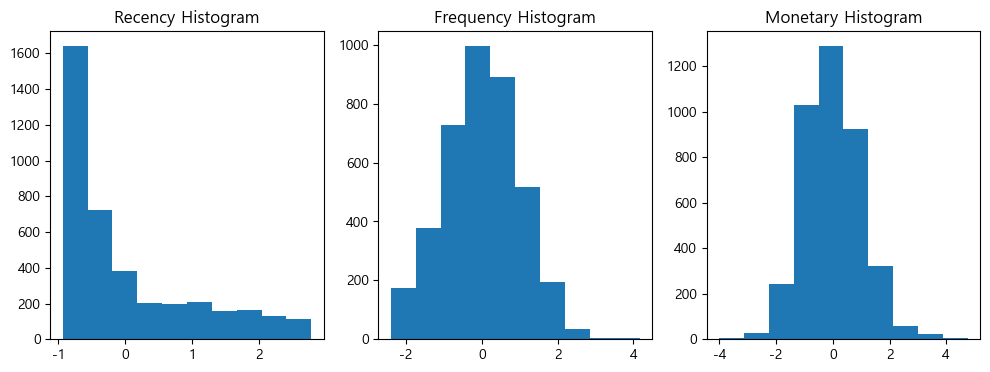

In [62]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(df_anal_log['Recency_log'])

ax2.set_title('Frequency Histogram')
ax2.hist(df_anal_log['Frequency_log'])

ax3.set_title('Monetary Histogram')
ax3.hist(df_anal_log['Monetary_log'])

## 모델 학습에 사용할 x값(예측변수) 설정

In [63]:
x3 = df_anal_log[ ['Recency_log', 'Frequency_log', 'Monetary_log'] ]
x3

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,2.322652,-2.403387,3.785914
12747,-0.914359,0.732578,1.444280
12748,-0.935303,3.739419,3.119983
12749,-0.903891,1.251577,1.423880
12820,-0.903891,0.296025,0.243880
...,...,...,...
18280,1.859022,-1.050388,-1.081104
18281,0.904138,-1.303133,-1.722264
18282,-0.862048,-0.917803,-1.092476


## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

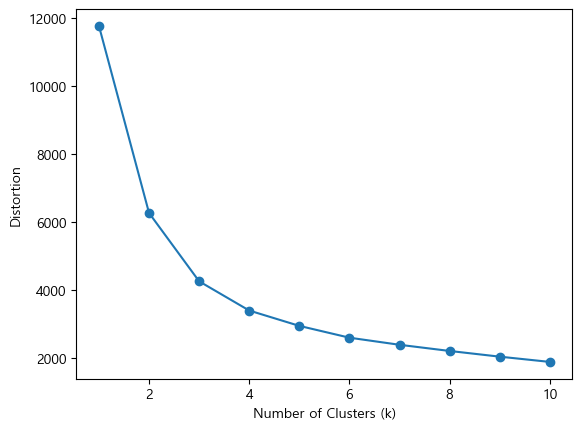

In [64]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model_kmeans = kmeans(i).fit(x3)
    inertia.append(model_kmeans.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 선정된 k값 모델로 학습

In [65]:
# k를 3개로 설정하고 군집 모델 학습
model_kmeans = kmeans(3).fit(x3)

## 군집화 결과 확인

In [66]:
# 각각의 클러스터의 중심 확인
print('< centers >')
print(model_kmeans.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model_kmeans.labels_)

< centers >
[[-0.35989582 -0.45873178 -0.46401067]
 [-0.57464677  0.95038889  0.95003076]
 [ 1.62413516 -0.81361831 -0.80362597]]

< labels >
[2 1 1 ... 0 1 1]


In [67]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result_3 = df_anal_log.copy()

df_result_3['km_cluster'] = model_kmeans.labels_

df_result_3.groupby( ['km_cluster'] ).count()

,Recency_log,Frequency_log,Monetary_log
km_cluster,,,
0,1551,1551,1551
1,1496,1496,1496
2,873,873,873


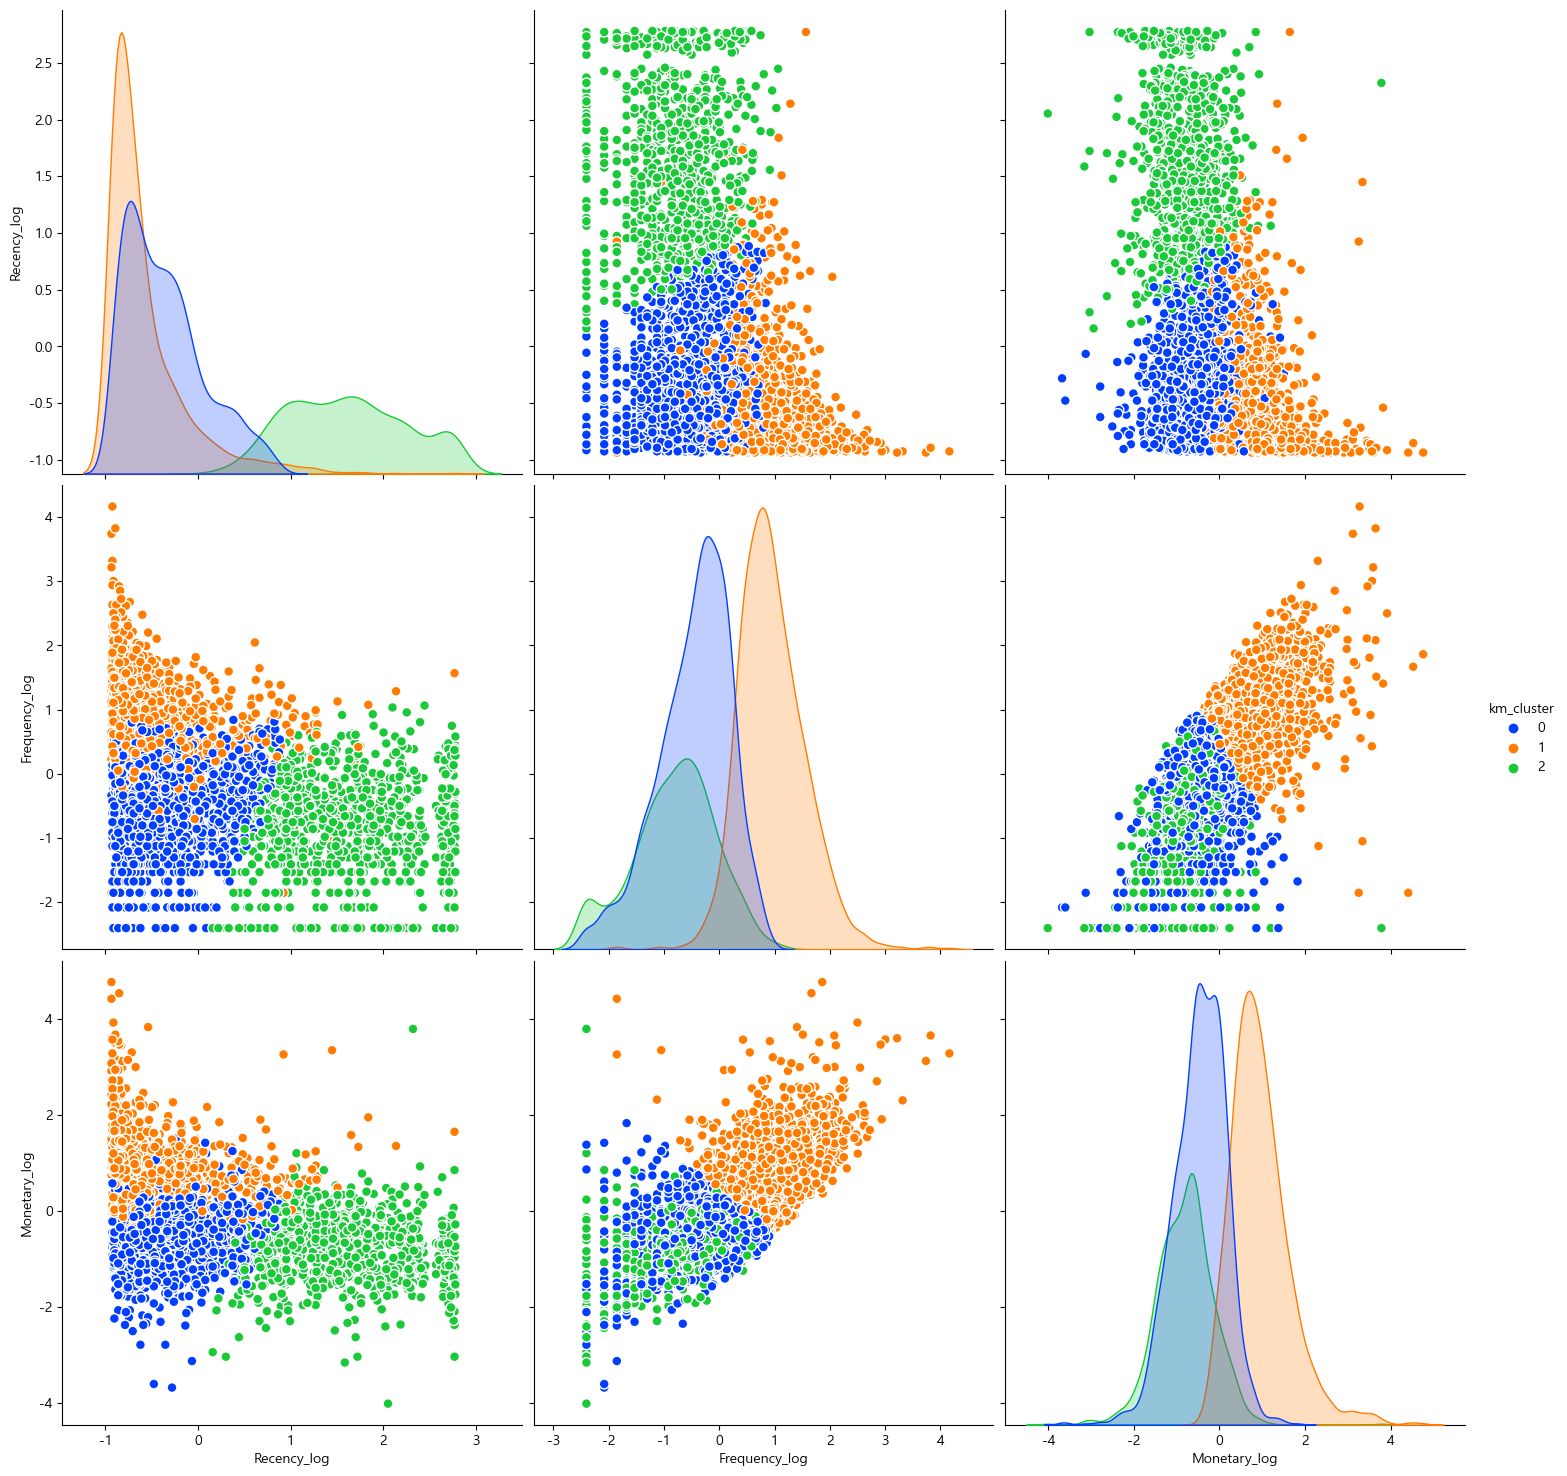

In [68]:
sb.pairplot( df_result_3,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 평가

### 개별 데이터 각각의 실루엣 계수 산출

In [69]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x3, model_kmeans.labels_ )

print('< 개별 데이터 각각의 실루엣 계수 >\n', score_samples)

< 개별 데이터 각각의 실루엣 계수 >
 [0.05900275 0.54925516 0.35203232 ... 0.53319591 0.48895446 0.41970258]


In [70]:
# df_result_2에 실루엣 계수 컬럼 추가
df_result_3['silhouette_coeff'] = score_samples
df_result_3

,Recency_log,Frequency_log,Monetary_log,km_cluster,silhouette_coeff
CustomerID,,,,,
12346,2.322652,-2.403387,3.785914,2,0.059003
12747,-0.914359,0.732578,1.444280,1,0.549255
12748,-0.935303,3.739419,3.119983,1,0.352032
12749,-0.903891,1.251577,1.423880,1,0.599528
12820,-0.903891,0.296025,0.243880,1,0.101877
...,...,...,...,...,...
18280,1.859022,-1.050388,-1.081104,2,0.548762
18281,0.904138,-1.303133,-1.722264,2,0.250875
18282,-0.862048,-0.917803,-1.092476,0,0.533196


In [71]:
# 군집별 평균 실루엣 계수
group_silhouette = df_result_3.groupby('km_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette)

< 군집별 평균 실루엣 계수 >
 km_cluster
0    0.354434
1    0.419119
2    0.360954
Name: silhouette_coeff, dtype: float64


### 평균 실루엣 계수 산출

In [72]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x3, model_kmeans.labels_ )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )

전체 평균 실루엣 계수: 0.3806


### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score by k >

k = 2 :  0.4005473615852454
k = 3 :  0.38057204782651133
k = 4 :  0.3351356203298386
k = 5 :  0.3249175455935986
k = 6 :  0.28807084073127714



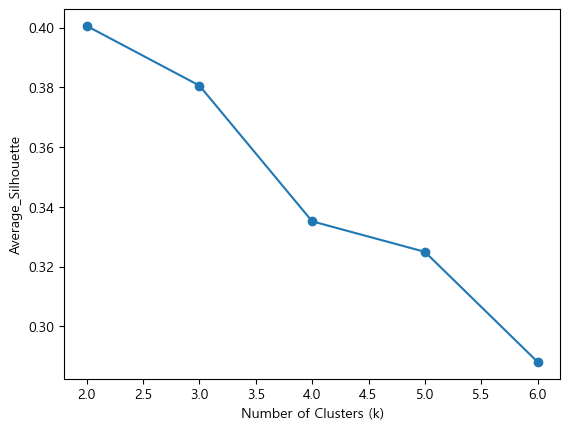

In [73]:
x = x3

# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,7)

In [74]:
x = x3

# k를 2부터 6까지 변화시켜가며 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,7)

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg      group                     
0.400547 0      0.305423  -0.095124
         1      0.483753   0.083205

Coeff  Coeff-avg
Avg      group                     
0.380572 0      0.354434  -0.026138
         1      0.419119   0.038547
         2      0.360954  -0.019618

Coeff  Coeff-avg
Avg      group                     
0.335136 0      0.352000   0.016865
         1      0.315676  -0.019460
         2      0.311709  -0.023427
         3      0.376677   0.041542

Coeff  Coeff-avg
Avg      group                     
0.324918 0      0.318900  -0.006018
         1      0.340403   0.015485
         2      0.283711  -0.041206
         3      0.255462  -0.069455
         4      0.373100   0.048183

Coeff  Coeff-avg
Avg      group                     
0.288071 0      0.253368  -0.034703
         1      0.308393   0.020322
         2      0.284854  -0.003216
         3      0.332333   0.044262
         4      0.286296  -0.001775
         5      0.253658  -0.034412

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

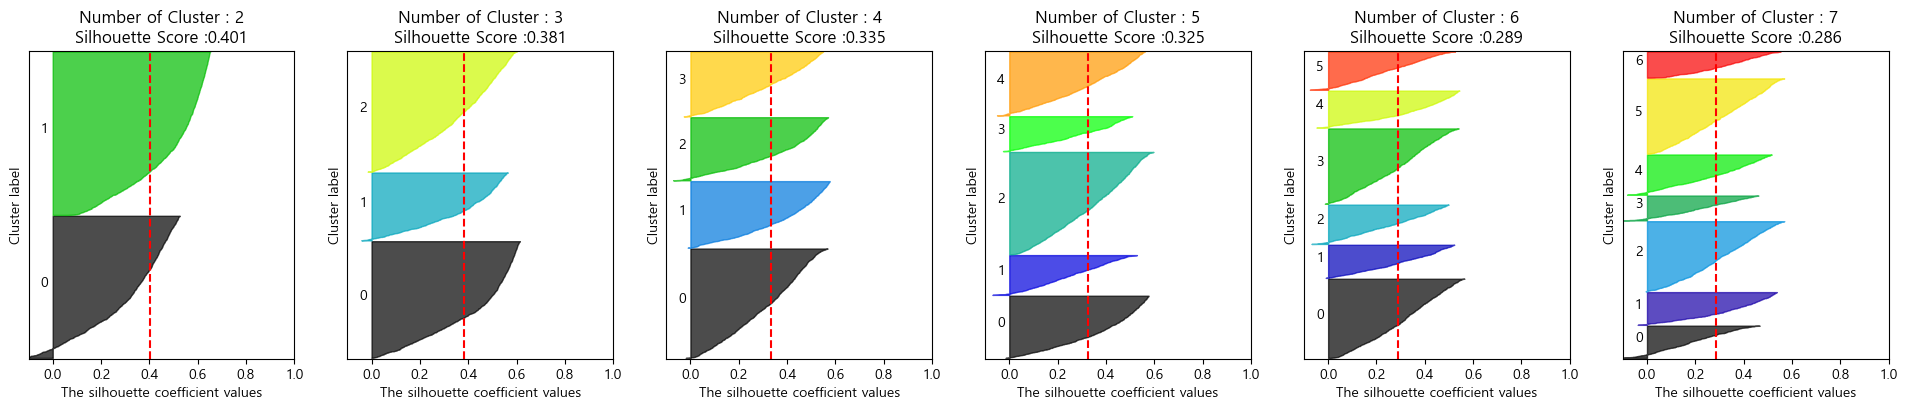

In [75]:
# cluster 개수를 2~7개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette( list(range(2,8)), x3)

## 평가 결과 반영하여 k값 조정 후 군집화 수행

In [76]:
# k를 2개로 설정하고 군집 모델 학습
model_kmeans = kmeans(2).fit(x3)

# 각각의 클러스터의 중심 확인
print('< centers >')
print(model_kmeans.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model_kmeans.labels_)

< centers >
[[ 0.63575765 -0.78129691 -0.76453635]
 [-0.557239    0.68480356  0.670113  ]]

< labels >
[0 1 1 ... 0 1 1]


In [77]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result_3 = df_anal_log.copy()

df_result_3['km_cluster'] = model_kmeans.labels_

df_result_3.groupby( ['km_cluster'] ).count()

,Recency_log,Frequency_log,Monetary_log
km_cluster,,,
0,1829,1829,1829
1,2091,2091,2091


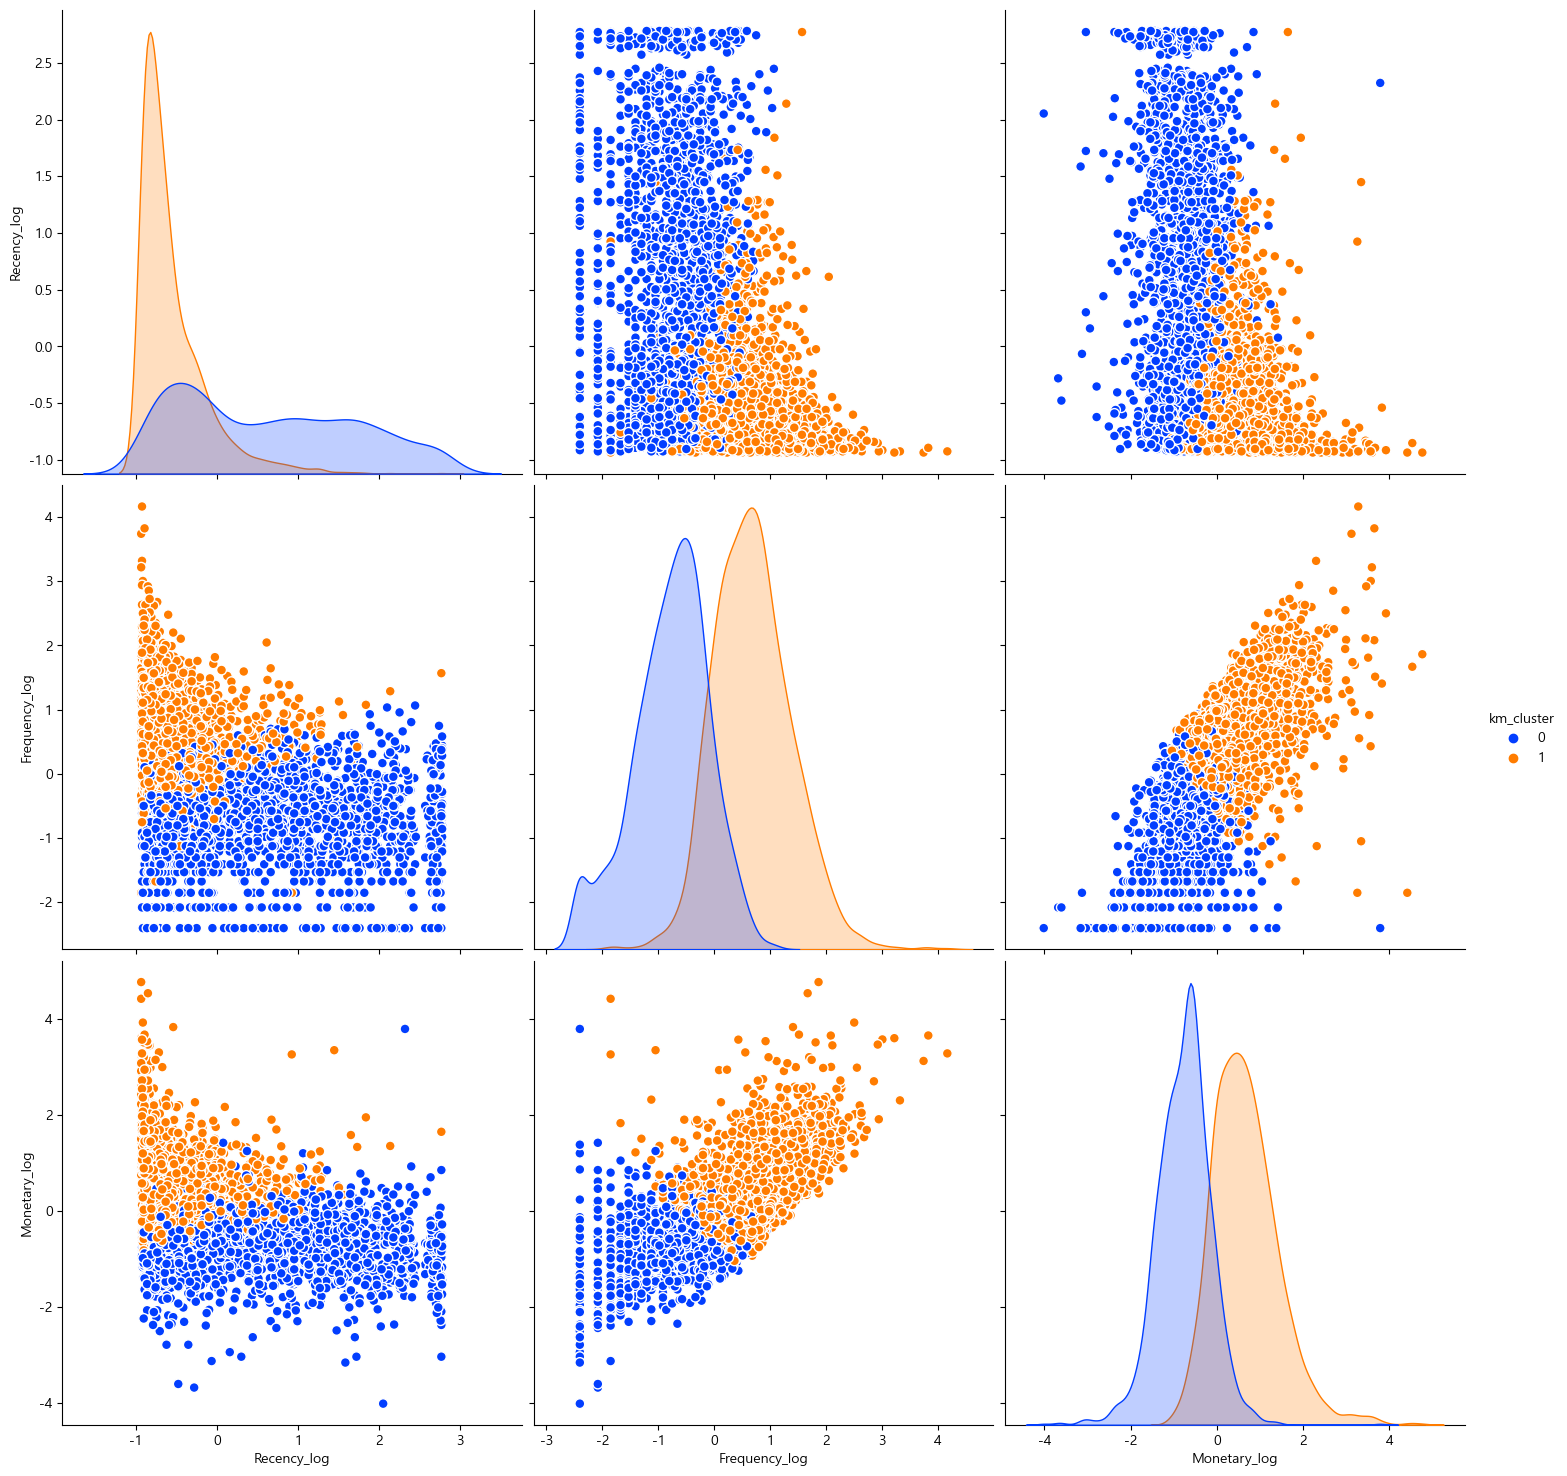

In [78]:
sb.pairplot( df_result_3,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

# [의문점] 실루엣 계수로 최적군집수를 판단하는 기준은?????

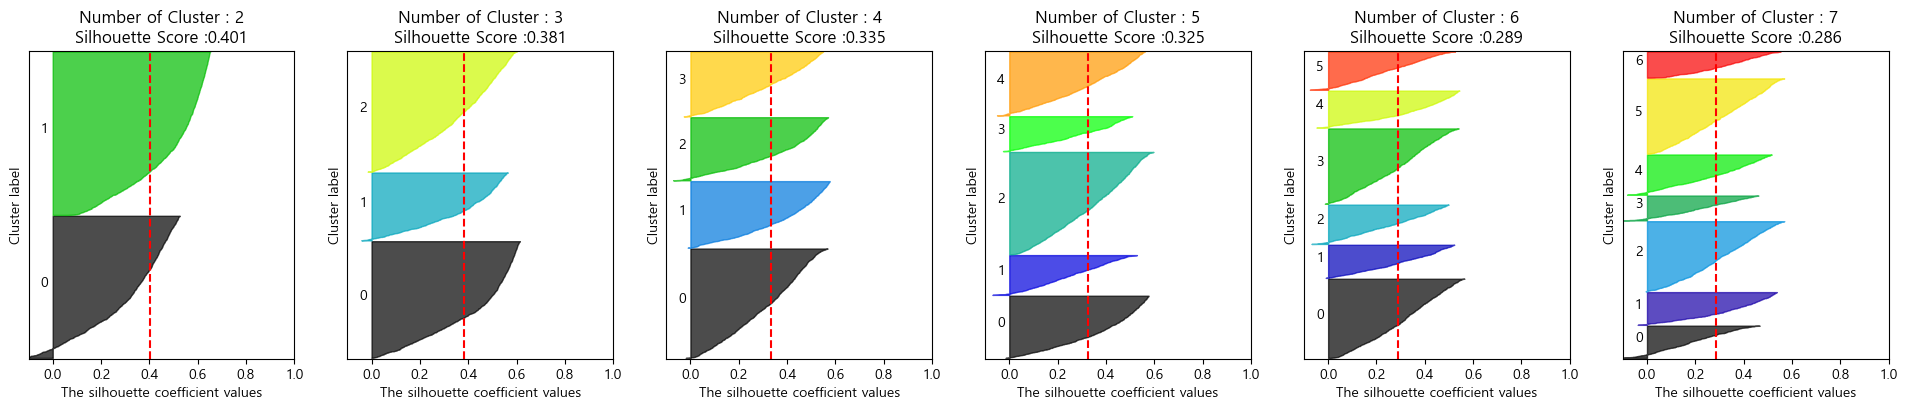

In [79]:
# cluster 개수를 2~7개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette( list(range(2,8)), x)

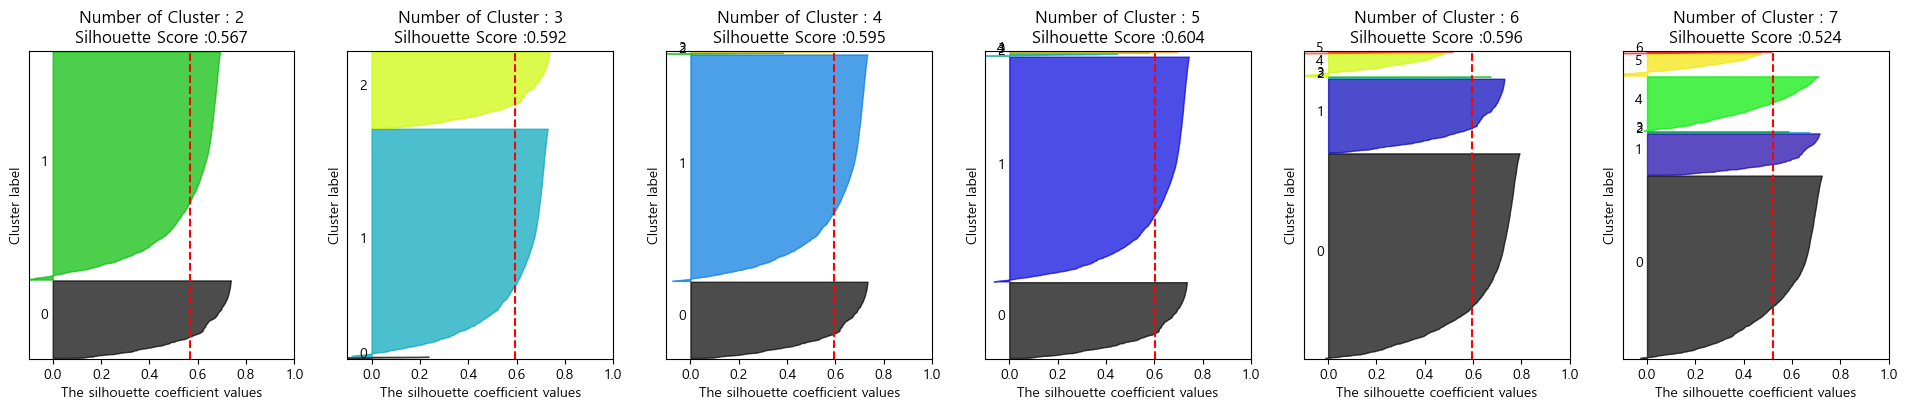

In [80]:
# cluster 개수를 2~6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette( list(range(2,8)), x2)

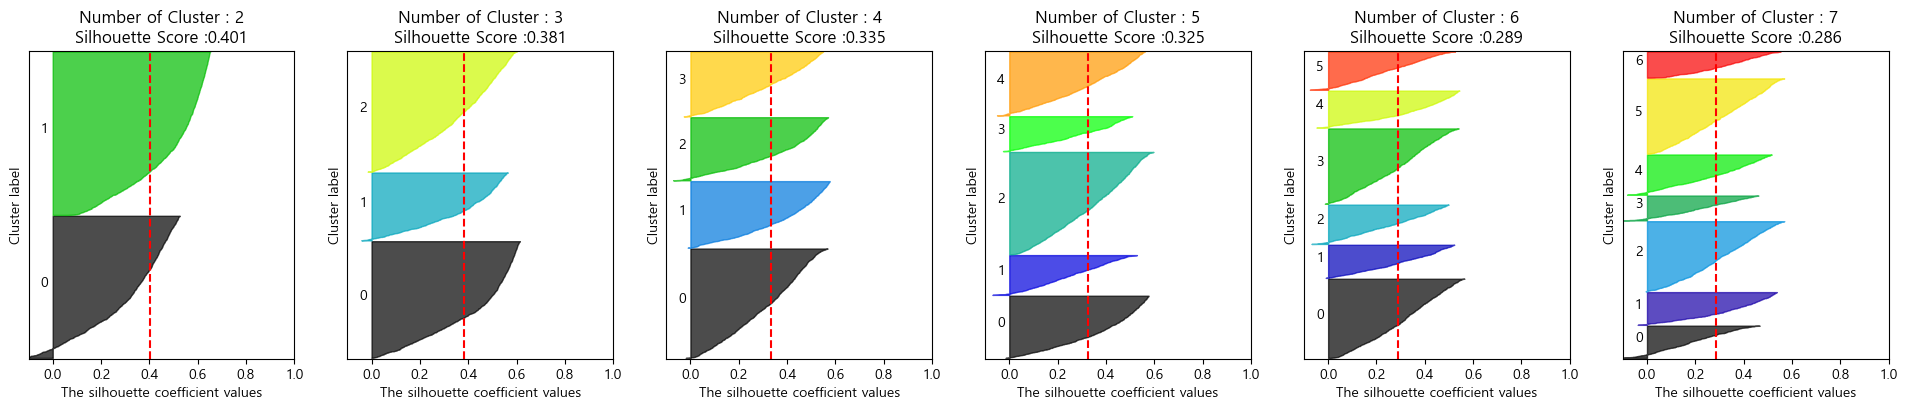

In [81]:
# cluster 개수를 2~7개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette( list(range(2,8)), x3)